In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-acceptability-classification-dataset/car.csv
/kaggle/input/car-acceptability-classification-dataset/car.data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)              

import sklearn
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv('/kaggle/input/car-acceptability-classification-dataset/car.csv')

In [4]:
data.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.isna().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

In [6]:
data.describe()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
X = data.drop(columns=['Car_Acceptability'])
y = data['Car_Acceptability']

In [8]:
unique_targets = list(set(y))
target_dict = dict(zip(unique_targets, range(len(unique_targets))))
y = y.replace(to_replace=unique_targets, value=list(target_dict.values()))

/tmp/ipykernel_17/876849864.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(to_replace=unique_targets, value=list(target_dict.values()))


In [9]:
y

0       3
1       3
2       3
3       3
4       3
       ..
1723    0
1724    1
1725    3
1726    0
1727    1
Name: Car_Acceptability, Length: 1728, dtype: int64

In [10]:
X_dummies = pd.get_dummies(X, prefix=X.columns)
X_dummies = X_dummies[X_dummies.columns].astype('category')
print(X_dummies.describe())
X_dummies = X_dummies[X_dummies.columns].astype('float')

       Buying_Price_high Buying_Price_low Buying_Price_med Buying_Price_vhigh  \
count               1728             1728             1728               1728   
unique                 2                2                2                  2   
top                False            False            False              False   
freq                1296             1296             1296               1296   

       Maintenance_Price_high Maintenance_Price_low Maintenance_Price_med  \
count                    1728                  1728                  1728   
unique                      2                     2                     2   
top                     False                 False                 False   
freq                     1296                  1296                  1296   

       Maintenance_Price_vhigh No_of_Doors_2 No_of_Doors_3  ...  \
count                     1728          1728          1728  ...   
unique                       2             2             2  ...   
top    

In [11]:
test_ratio = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, 
                                                    y, 
                                                    test_size = test_ratio, 
                                                    random_state=123)

print(X_train.shape)
print(X_test.shape)

(1382, 21)
(346, 21)


{'good': 0, 'vgood': 1, 'acc': 2, 'unacc': 3}


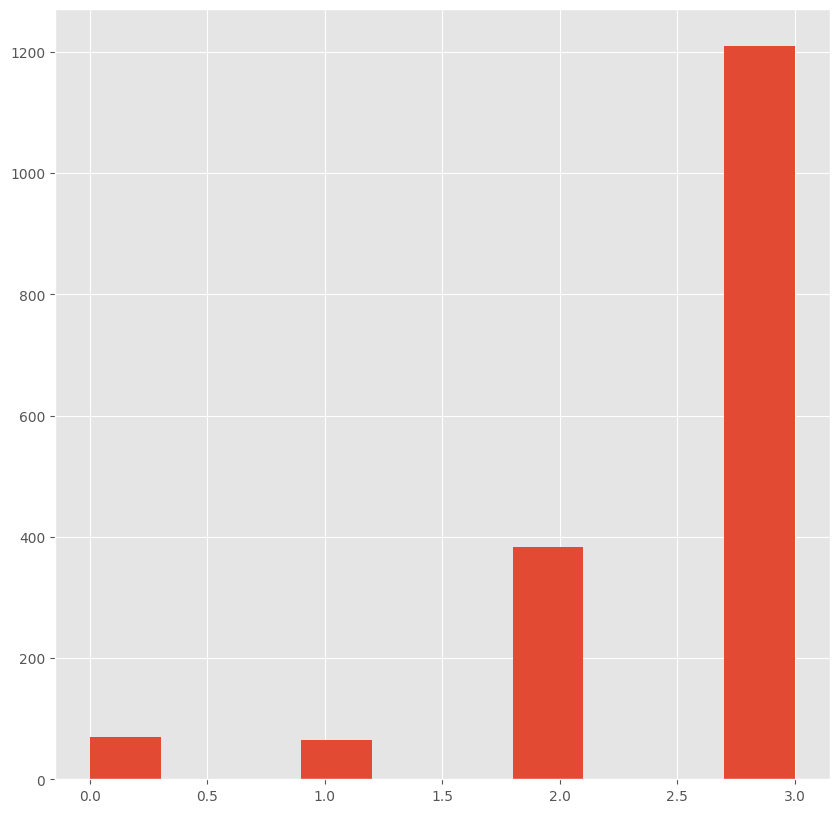

In [12]:
plt.hist(y)
print(target_dict)

**Unbalanced classes**

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

model_logistic = LogisticRegressionCV(Cs = np.linspace(0, 20, 200), cv = 4)
model_logistic.fit(X_train, Y_train)
model_logistic.score(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:446: RuntimeWarning: divide by zero encountered in scalar divide
  l2_reg_strength = 1.0 / C
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:172: RuntimeWarning: invalid value encountered in scalar multiply
  return 0.5 * l2_reg_strength * norm2_w
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:295: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

0.9442836468885673

In [14]:
preds = model_logistic.predict(X_test)
confusion_matrix(Y_test, preds)

array([[ 11,   2,   0,   0],
       [  0,  11,   1,   0],
       [  2,   1,  77,   4],
       [  0,   0,  14, 223]])

In [15]:
print(classification_report(Y_test, preds, target_names = unique_targets))

              precision    recall  f1-score   support

        good       0.85      0.85      0.85        13
       vgood       0.79      0.92      0.85        12
         acc       0.84      0.92      0.88        84
       unacc       0.98      0.94      0.96       237

    accuracy                           0.93       346
   macro avg       0.86      0.91      0.88       346
weighted avg       0.94      0.93      0.93       346



# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

number_of_neighbors = np.arange(3, 25, 2)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors": number_of_neighbors}

grid_search = GridSearchCV(estimator = model_KNN, 
                           param_grid = params, cv = 6)

In [17]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])})

In [18]:
grid_search.best_score_

0.92258924650229

In [19]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [20]:
preds_knn = grid_search.predict(X_test)

In [21]:
confusion_matrix(Y_test, preds_knn)

array([[  5,   1,   7,   0],
       [  1,  10,   1,   0],
       [  0,   2,  75,   7],
       [  0,   0,   6, 231]])

In [22]:
print(classification_report(Y_test, preds_knn))

              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.77      0.83      0.80        12
           2       0.84      0.89      0.87        84
           3       0.97      0.97      0.97       237

    accuracy                           0.93       346
   macro avg       0.85      0.77      0.79       346
weighted avg       0.93      0.93      0.92       346



# SVM

In [23]:
from sklearn.svm import SVC

line_param = np.linspace(1, 20, 100)
parameters = {'kernel':('linear', "poly", "sigmoid"), 'C':line_param}
SVC()
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv = 6)
grid_search_svm.fit(X_train, Y_train)
grid_search_svm.best_score_

0.994940084070519

In [24]:
grid_search_svm.best_estimator_

SVC(C=1.9595959595959596, kernel='poly')

In [25]:
preds_svm = grid_search_svm.predict(X_test)
print(classification_report(Y_test, preds_svm, target_names = unique_targets))

              precision    recall  f1-score   support

        good       0.93      1.00      0.96        13
       vgood       1.00      1.00      1.00        12
         acc       1.00      0.99      0.99        84
       unacc       1.00      1.00      1.00       237

    accuracy                           1.00       346
   macro avg       0.98      1.00      0.99       346
weighted avg       1.00      1.00      1.00       346



In [26]:
confusion_matrix(Y_test, preds_svm)

array([[ 13,   0,   0,   0],
       [  0,  12,   0,   0],
       [  1,   0,  83,   0],
       [  0,   0,   0, 237]])